In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
import os

In [35]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [36]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [37]:
# Setting paths
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
cars_csv_path = os.path.join(data_dir, "train.csv")
#----------------------------------------------------------------------------------------------------
# Creading dataframes
df_car = pd.read_csv(cars_csv_path)

In [38]:
df_car = pd.read_csv(cars_csv_path)
df_car.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
32881,32881,Porsche,Cayenne S,2015,67210,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,51500
181079,181079,Ford,F-250 XLT,2018,27000,E85 Flex Fuel,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Gray,None reported,Yes,52500
101726,101726,Toyota,Tacoma Base,2019,73846,Gasoline,3.5 Liter,6 Speed At/Mt,Midnight Black Metallic,Black/Gun Metal,None reported,NaN,28251
98310,98310,Volkswagen,Jetta 1.4T SE,2016,96000,Gasoline,150.0HP 1.4L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,14500
120586,120586,Jeep,Wrangler Sport,2014,92700,Gasoline,3.6L V6 24V MPFI DOHC,5-Speed Automatic,Black Clearcoat,Black,None reported,Yes,17500


In [39]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [40]:
df_car.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [41]:
def check_missing_data(df_car):
    nulls = df_car.isnull().sum()
    null_percentage = (nulls / len(df_car) * 100).round(2)
    null_report = pd.DataFrame({'null content': nulls, 'null%':null_percentage})
    print(f"Qty of rows: ({len(df_car)})")
    print(null_report)

check_df = check_missing_data(df_car)
# Visualizar los datos faltantes  


Qty of rows: (188533)
              null content  null%
id                       0   0.00
brand                    0   0.00
model                    0   0.00
model_year               0   0.00
milage                   0   0.00
fuel_type             5083   2.70
engine                   0   0.00
transmission             0   0.00
ext_col                  0   0.00
int_col                  0   0.00
accident              2452   1.30
clean_title          21419  11.36
price                    0   0.00


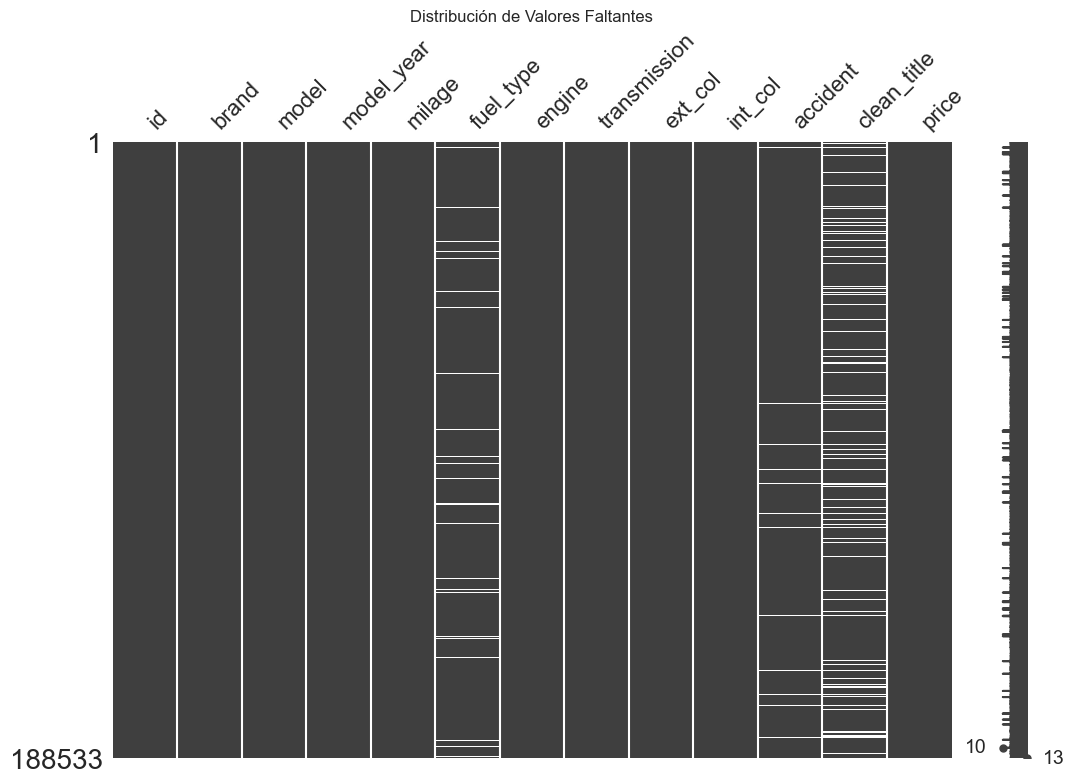

In [42]:
# Visualización de valores faltantes
msno.matrix(df_car, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()


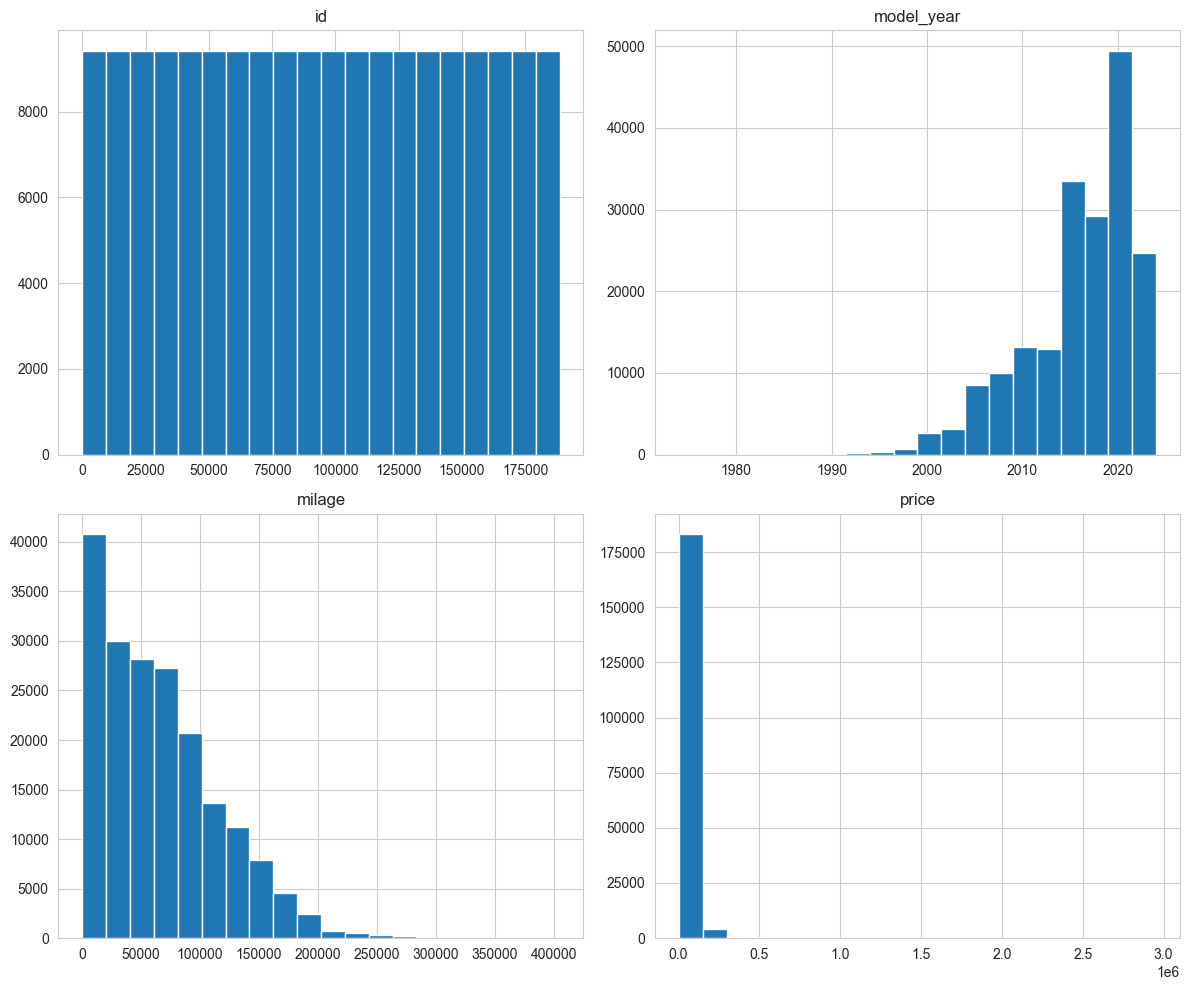

In [43]:
# Histogramas para todas las variables numéricas
df_car.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

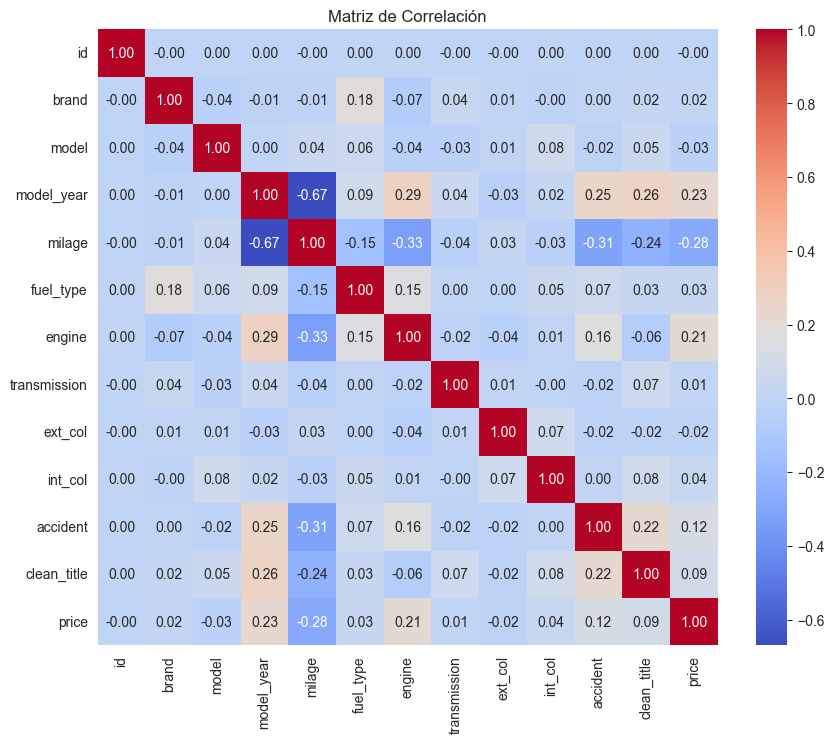

In [44]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_car.copy()
# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [45]:
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(df_car[col].dropna())
    print(f"{col}: p-value = {p:.4f}")  # p < 0.05 → no normal

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
price: p-value = 0.0000


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188533.
  res = hypotest_fun_out(*samples, **kwds)


In [46]:
from scipy.stats import kstest
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    data = df_car[col].dropna()
    stat, p = kstest(data, 'norm')
    print(f"{col}: p-value = {p:.4f}")

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
price: p-value = 0.0000


In [47]:
target_corr = df_encoded.corr()["price"].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo (price):\n", target_corr)


Correlación con la variable objetivo (price):
 price           1.000000
model_year      0.231795
engine          0.208285
accident        0.123034
clean_title     0.089433
int_col         0.035174
fuel_type       0.034321
brand           0.017657
transmission    0.014560
id             -0.000877
ext_col        -0.017342
model          -0.029865
milage         -0.283067
Name: price, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\2350284615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_car, y='model_year', x='price', palette="Set2")


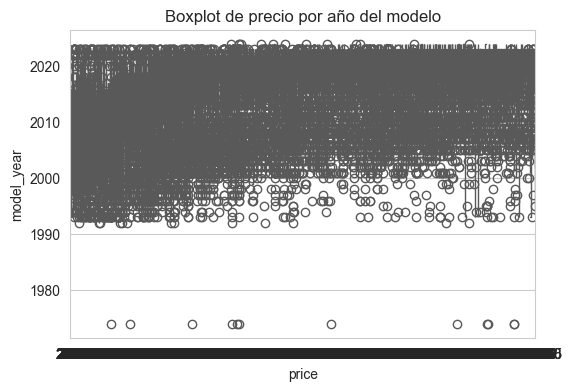

In [48]:
sns.boxplot(data=df_car, y='model_year', x='price', palette="Set2")
plt.title("Boxplot de precio por año del modelo")
plt.show()


In [49]:
# from scipy.stats import shapiro

# for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
#     stat, p = shapiro(df_car[col].dropna())
#     print(f"{col}: p-value = {p:.4f}")  # p < 0.05 → no normal

In [50]:
from scipy.stats import kstest

for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    data = df_car[col].dropna()
    stat, p = kstest(data, 'norm')
    print(f"{col}: p-value = {p:.4f}")

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
price: p-value = 0.0000


In [51]:
from scipy.stats import f_oneway

# Ejemplo: Comparar 'strength' entre grupos (si hay una columna categórica)
if 'cement_type' in df_car.columns:
    groups = [df_car[df_car['cement_type'] == g]['price'] for g in df_car['milage'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA p-value: {p_value:.4f}")

In [52]:
from scipy.stats import ttest_ind

# Ejemplo: Comparar 'strength' entre dos grupos específicos
group_a = df_car[df_car['model_year'] == 'A']['price']
group_b = df_car[df_car['model_year'] == 'B']['price']
t_stat, p_value = ttest_ind(group_a, group_b)
print(f"t-test p-value: {p_value:.4f}")

t-test p-value: nan


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [53]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Ejemplo para la columna 'strength'
outliers_price = detect_outliers_iqr(df_car, 'price')
print(f"Número de outliers en 'price': {len(outliers_price)}")

Número de outliers en 'price': 10880


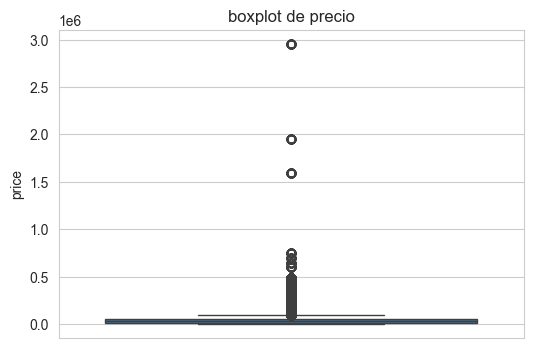

In [54]:
sns.boxplot(data=df_car,y='price')
plt.title("boxplot de precio")
plt.show()

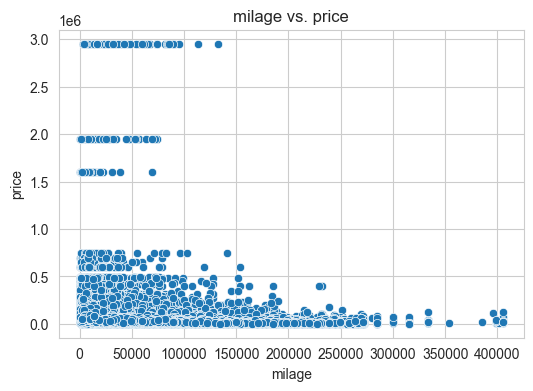

In [55]:
sns.scatterplot(data=df_car, x='milage', y='price')
plt.title("milage vs. price")
plt.show()

## Realizando pruebas parametricas


In [60]:
shapiro_test = stats.shapiro(df_car["price"])
print("Shapiro-Wilk p-valor:", shapiro_test.pvalue)

Shapiro-Wilk p-valor: 7.05121485982967e-190


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188533.
  res = hypotest_fun_out(*samples, **kwds)


In [61]:
# Ejemplo para comparar varianzas entre grupos (ej: precios por marca)
levene_test = stats.levene(
    df_car[df_car["model_year"] == "Toyota"]["price"],
    df_car[df_car["model_year"] == "Ford"]["price"]
)
print("Levene p-valor:", levene_test.pvalue)

Levene p-valor: nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\30869020.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene_test = stats.levene(


In [63]:
t_test = stats.ttest_ind(
    df_car[df_car["model_year"] == "Toyota"]["price"],
    df_car[df_car["model_year"] == "Ford"]["price"],
    equal_var=True  # Si homocedasticidad = True
)
print("t-test p-valor:", t_test.pvalue)

t-test p-valor: nan


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [64]:
anova_test = stats.f_oneway(
    df_car[df_car["model_year"] == "Toyota"]["price"],
    df_car[df_car["model_year"] == "Ford"]["price"],
    df_car[df_car["model_year"] == "Chevrolet"]["price"]
)
print("ANOVA p-valor:", anova_test.pvalue)

ANOVA p-valor: nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\3028011255.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_test = stats.f_oneway(


In [65]:
pearson_corr = df_car[["price", "milage"]].corr(method="pearson")
print(pearson_corr)

           price    milage
price   1.000000 -0.283067
milage -0.283067  1.000000


## Realizando pruebas no parametricas


In [67]:
#Prueba de Mann-Whitney U (Wilcoxon rank-sum)
from scipy import stats

grupo_toyota = df_car[df_car["milage"] == "Toyota"]["price"]
grupo_ford = df_car[df_car["milage"] == "Ford"]["price"]

stats.mannwhitneyu(grupo_toyota, grupo_ford)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\1165132243.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.mannwhitneyu(grupo_toyota, grupo_ford)


MannwhitneyuResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [71]:
precios_antes = df_car["price","year"]
precios_despues = df_car["price","year"]

stats.wilcoxon(precios_antes, precios_despues)

KeyError: ('price', 'year')

In [72]:
grupo_toyota = df_car[df_car["model_year"] == "Toyota"]["price"]
grupo_ford = df_car[df_car["model_year"] == "Ford"]["price"]
grupo_chevrolet = df_car[df_car["model_year"] == "Chevrolet"]["price"]

stats.kruskal(grupo_toyota, grupo_ford, grupo_chevrolet)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\2879208288.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.kruskal(grupo_toyota, grupo_ford, grupo_chevrolet)


KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [73]:
# Spearman
df_car[["price", "milage"]].corr(method="spearman")

# Kendall
df_car[["price", "milage"]].corr(method="kendall")

,price,milage
price,1.000000,-0.553858
milage,-0.553858,1.000000


In [74]:
stats.fligner(
    df_car[df_car["model_year"] == "Toyota"]["price"],
    df_car[df_car["model_year"] == "Ford"]["price"]
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\1524381687.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.fligner(


FlignerResult(statistic=np.float64(nan), pvalue=np.float64(nan))